In [1]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
sns.set(style='white')

In [3]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [4]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['SciField'] = data['SciField'] - 1
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data.head()

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,...,SciLit_sum,SciTudeA_sum,SciTudeL_sum,SciTudeS_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,5.0,biomedical-science,NaN,NaN,14,4,...,4.0,25.0,21.0,24.0,9.0,14.0,17.0,9.0,12.0,13.0
1,102,Video,19.0,1.0,5.0,forensic-science,NaN,NaN,12,3,...,2.0,21.0,22.0,26.0,17.0,19.0,14.0,11.0,11.0,9.0
2,103,Original,18.0,0.0,2.0,communications,NaN,NaN,12,3,...,2.0,27.0,13.0,21.0,16.0,13.0,16.0,10.0,11.0,16.0
3,104,Annotated,18.0,0.0,5.0,statistics,NaN,NaN,12,4,...,2.0,30.0,20.0,27.0,17.0,13.0,20.0,14.0,15.0,13.0
4,105,Video,18.0,0.0,5.0,biomedical-science,NaN,NaN,12,6,...,4.0,21.0,13.0,28.0,17.0,13.0,12.0,12.0,10.0,13.0


# Demographics

In [5]:
df = data.groupby(['AgeGroup','Condition']).agg({
    'sub':'count', 'Age':'mean', 'Gender':'mean', 'SciField':'mean',
    'comp_change':'mean', 'comp_t1':'mean', 'comp_t2':'mean'
})
df

sub        Age    Gender  SciField  comp_change  \
AgeGroup Condition                                                    
OA       Annotated    9  71.333333  0.555556  0.888889     1.666667   
         Original     9  74.166667  0.888889  0.555556     3.666667   
         Video        9  74.375000  0.750000  0.666667     3.777778   
YA       Annotated   19  18.421053  0.789474  0.315789     2.578947   
         Original    22  18.714286  0.545455  0.272727     4.045455   
         Video       20  19.100000  0.600000  0.150000     3.700000   

                      comp_t1    comp_t2  
AgeGroup Condition                        
OA       Annotated  12.666667  14.333333  
         Original   11.000000  14.666667  
         Video      10.555556  14.333333  
YA       Annotated  10.315789  12.894737  
         Original    9.636364  13.681818  
         Video       9.850000  13.550000

# Group comparisons

In [6]:
vars_of_interest = ['comp_t1', 'comp_t2', 'comp_change', 'nb_CoR', 'nb_RT', 'procspd_RT',
                    'NFCS_sum','TSSI_sum', 'vocab_sum','SciLit_sum',
                    'SciTudeA_sum','SciTudeL_sum','SciTudeS_sum']

In [7]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations
We need to drop all missing data listwise. SPSS does this pairwise for the correlations, but I'm not sure how exactly to replicate that. If we find a way to, I would prefer not to destroy data unnecessarily here.

In [8]:
slim_data = data[['sub','AgeGroup','Condition']+vars_of_interest].dropna()

## Correlation Matrices

Define functions to create the correlation & significance tables and matrices

In [9]:
def corr_table(df):
    corr_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            corr_df.loc[c,d] = sp.pearsonr(df[c],df[d])[0]
    return(corr_df)

def sig_table(df):
    sig_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            sig_df.loc[c,d] = sp.pearsonr(df[c],df[d])[1]
    return(sig_df)

In [10]:
def matrix_mask(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(16,5))
    return(mask)

In [11]:
def correlation_matrix(df,title):
    mask = matrix_mask(df)
    fig = sns.heatmap(df, mask=mask, annot=True, cmap='Spectral',
                      fmt='.3f', linewidths=1, center=0)
    fig.set_title(title+'\nCorrelation Coefficients')
    return(fig)

def significance_matrix(df,title):
    mask = matrix_mask(df)
    myColors = (
        (0.4, 0.0, 0.0, 1.00),(0.6, 0.0, 0.0, 0.85),(0.8, 0.0, 0.0, 0.70),(1.0, 0.0, 0.0, 0.55),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
    )
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    fig = sns.heatmap(df, mask=mask, annot=True, cmap=cmap,
                fmt='.3f', linewidths=1, center=0.5
               )
    fig.set_title(title+'\nCorrelation Significance')
    return(fig)

### All AgeGroups,Conditions

In [12]:
corr_df = corr_table(slim_data)
sig_df = sig_table(slim_data)

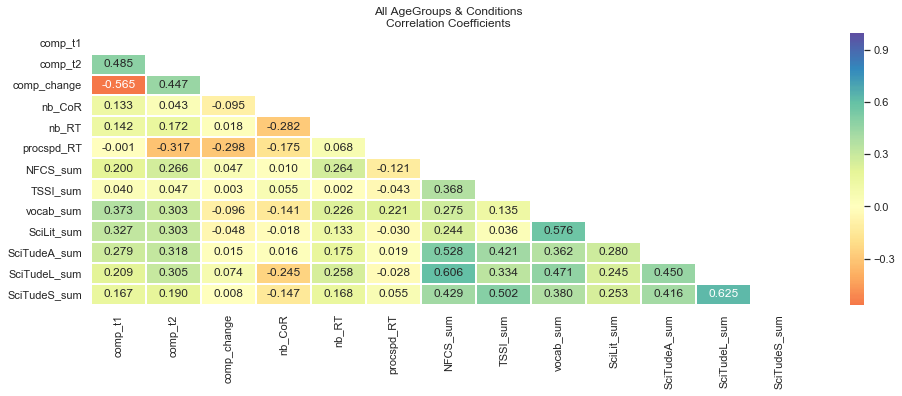

In [13]:
fpath = os.path.join('..','derivatives','figures','allgroups_correlations.png')
fig = correlation_matrix(corr_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath, bbox_inches='tight')

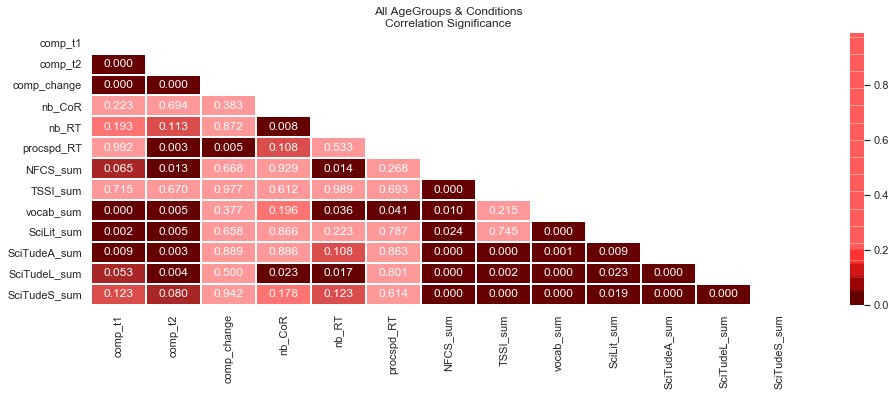

In [14]:
fpath = os.path.join('..','derivatives','figures','allgroups_significance.png')
fig = significance_matrix(sig_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath, bbox_inches='tight')

### By AgeGroup

In [15]:
ya_data = slim_data[slim_data['AgeGroup'] == 'YA']
oa_data = slim_data[slim_data['AgeGroup'] == 'OA']

In [16]:
ya_corr_df = corr_table(ya_data)
ya_sig_df = sig_table(ya_data)
oa_corr_df = corr_table(oa_data)
oa_sig_df = sig_table(oa_data)

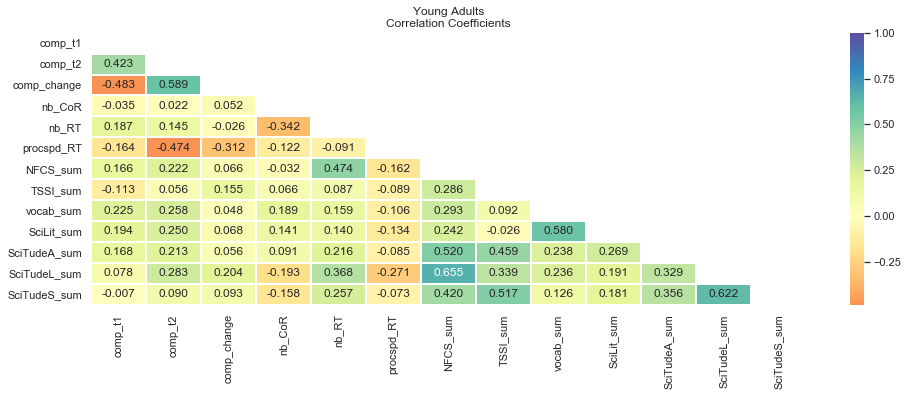

In [17]:
fig = correlation_matrix(ya_corr_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_correlations.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

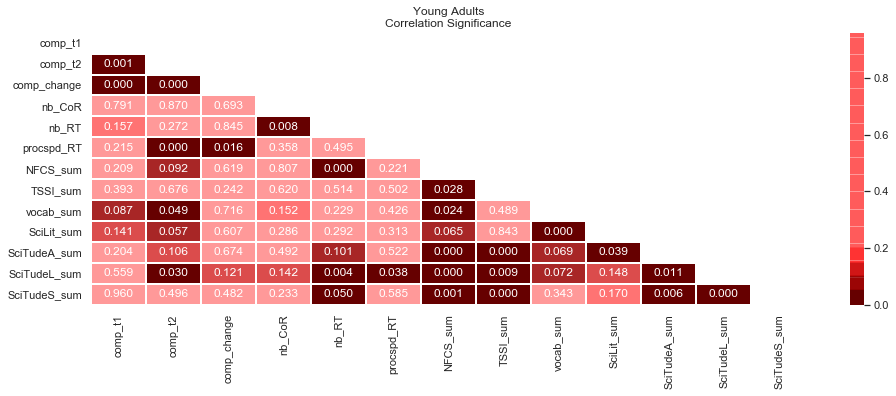

In [18]:
fig = significance_matrix(ya_sig_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_significance.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

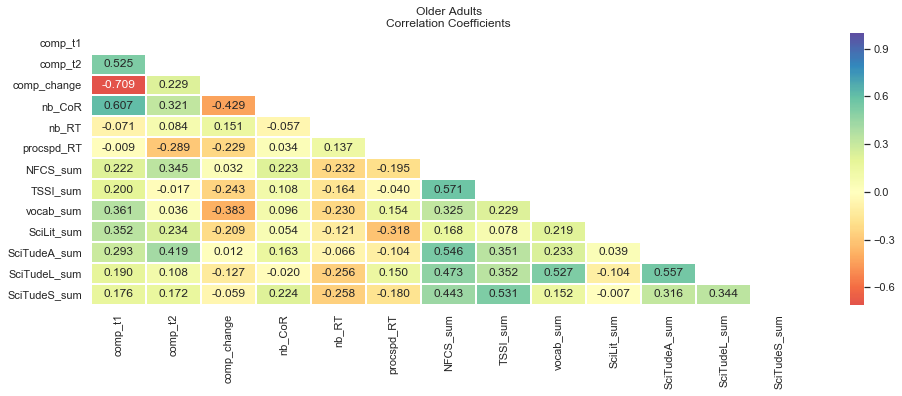

In [19]:
fig = correlation_matrix(oa_corr_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_correlations.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

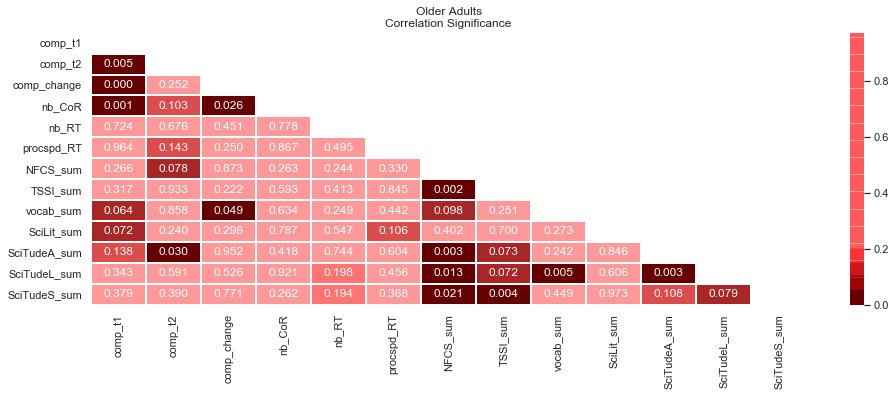

In [20]:
fig = significance_matrix(oa_sig_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_significance.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

### By Condition

In [21]:
annotated_data = slim_data[slim_data['Condition'] == 'Annotated']
original_data = slim_data[slim_data['Condition'] == 'Original']
video_data = slim_data[slim_data['Condition'] == 'Video']

In [22]:
annotated_corr_df = corr_table(annotated_data)
annotated_sig_df = sig_table(annotated_data)

original_corr_df = corr_table(original_data)
original_sig_df = sig_table(original_data)

video_corr_df = corr_table(video_data)
video_sig_df = sig_table(video_data)

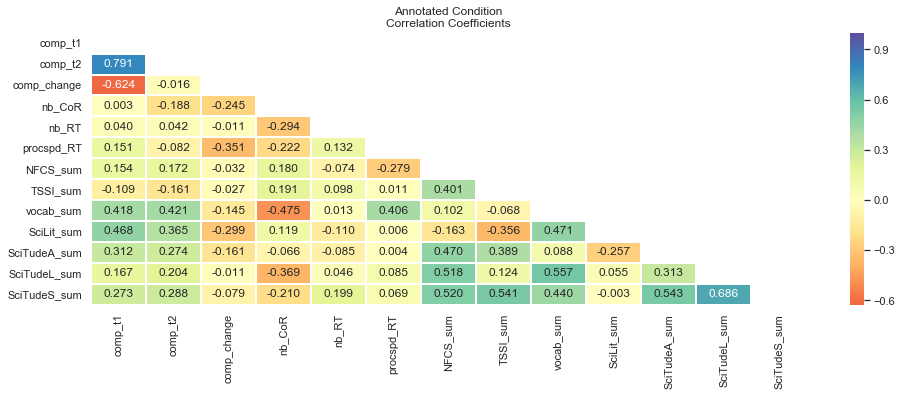

In [23]:
fig = correlation_matrix(annotated_corr_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_correlations.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

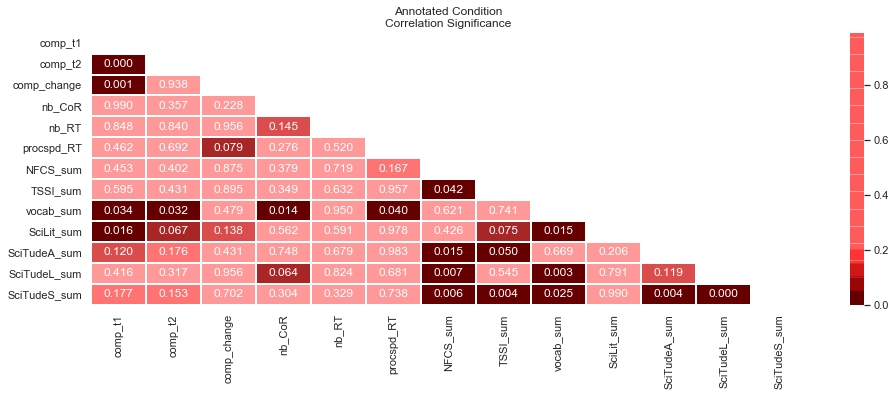

In [24]:
fig = significance_matrix(annotated_sig_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_significance.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

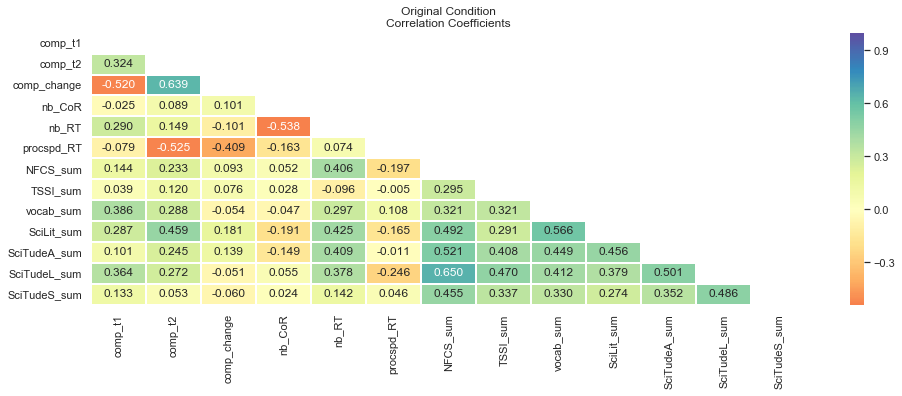

In [25]:
fig = correlation_matrix(original_corr_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_correlations.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

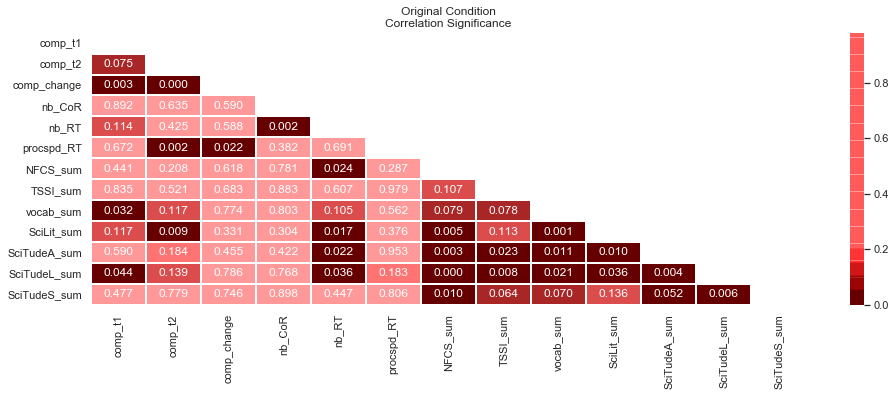

In [26]:
fig = significance_matrix(original_sig_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_significance.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

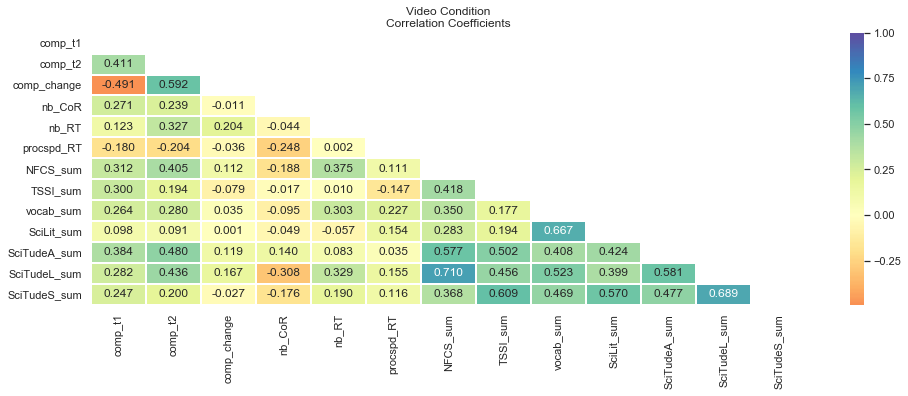

In [27]:
fig = correlation_matrix(video_corr_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_correlations.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

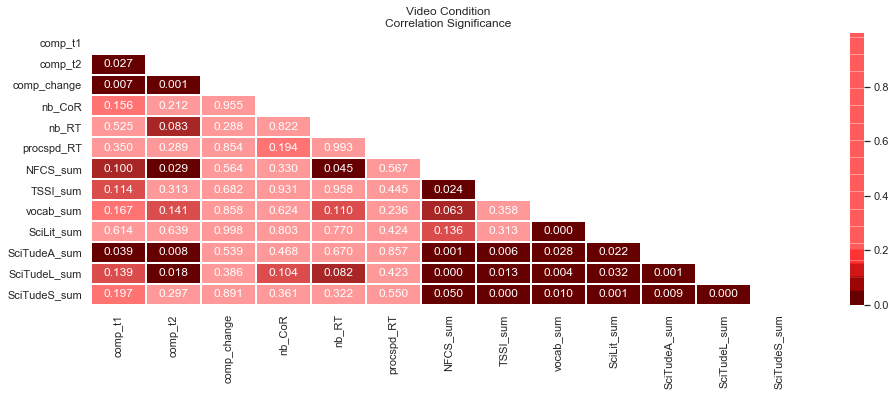

In [28]:
fig = significance_matrix(video_sig_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_significance.png')
fig.get_figure().savefig(fpath, bbox_inches='tight')

## Correlograms

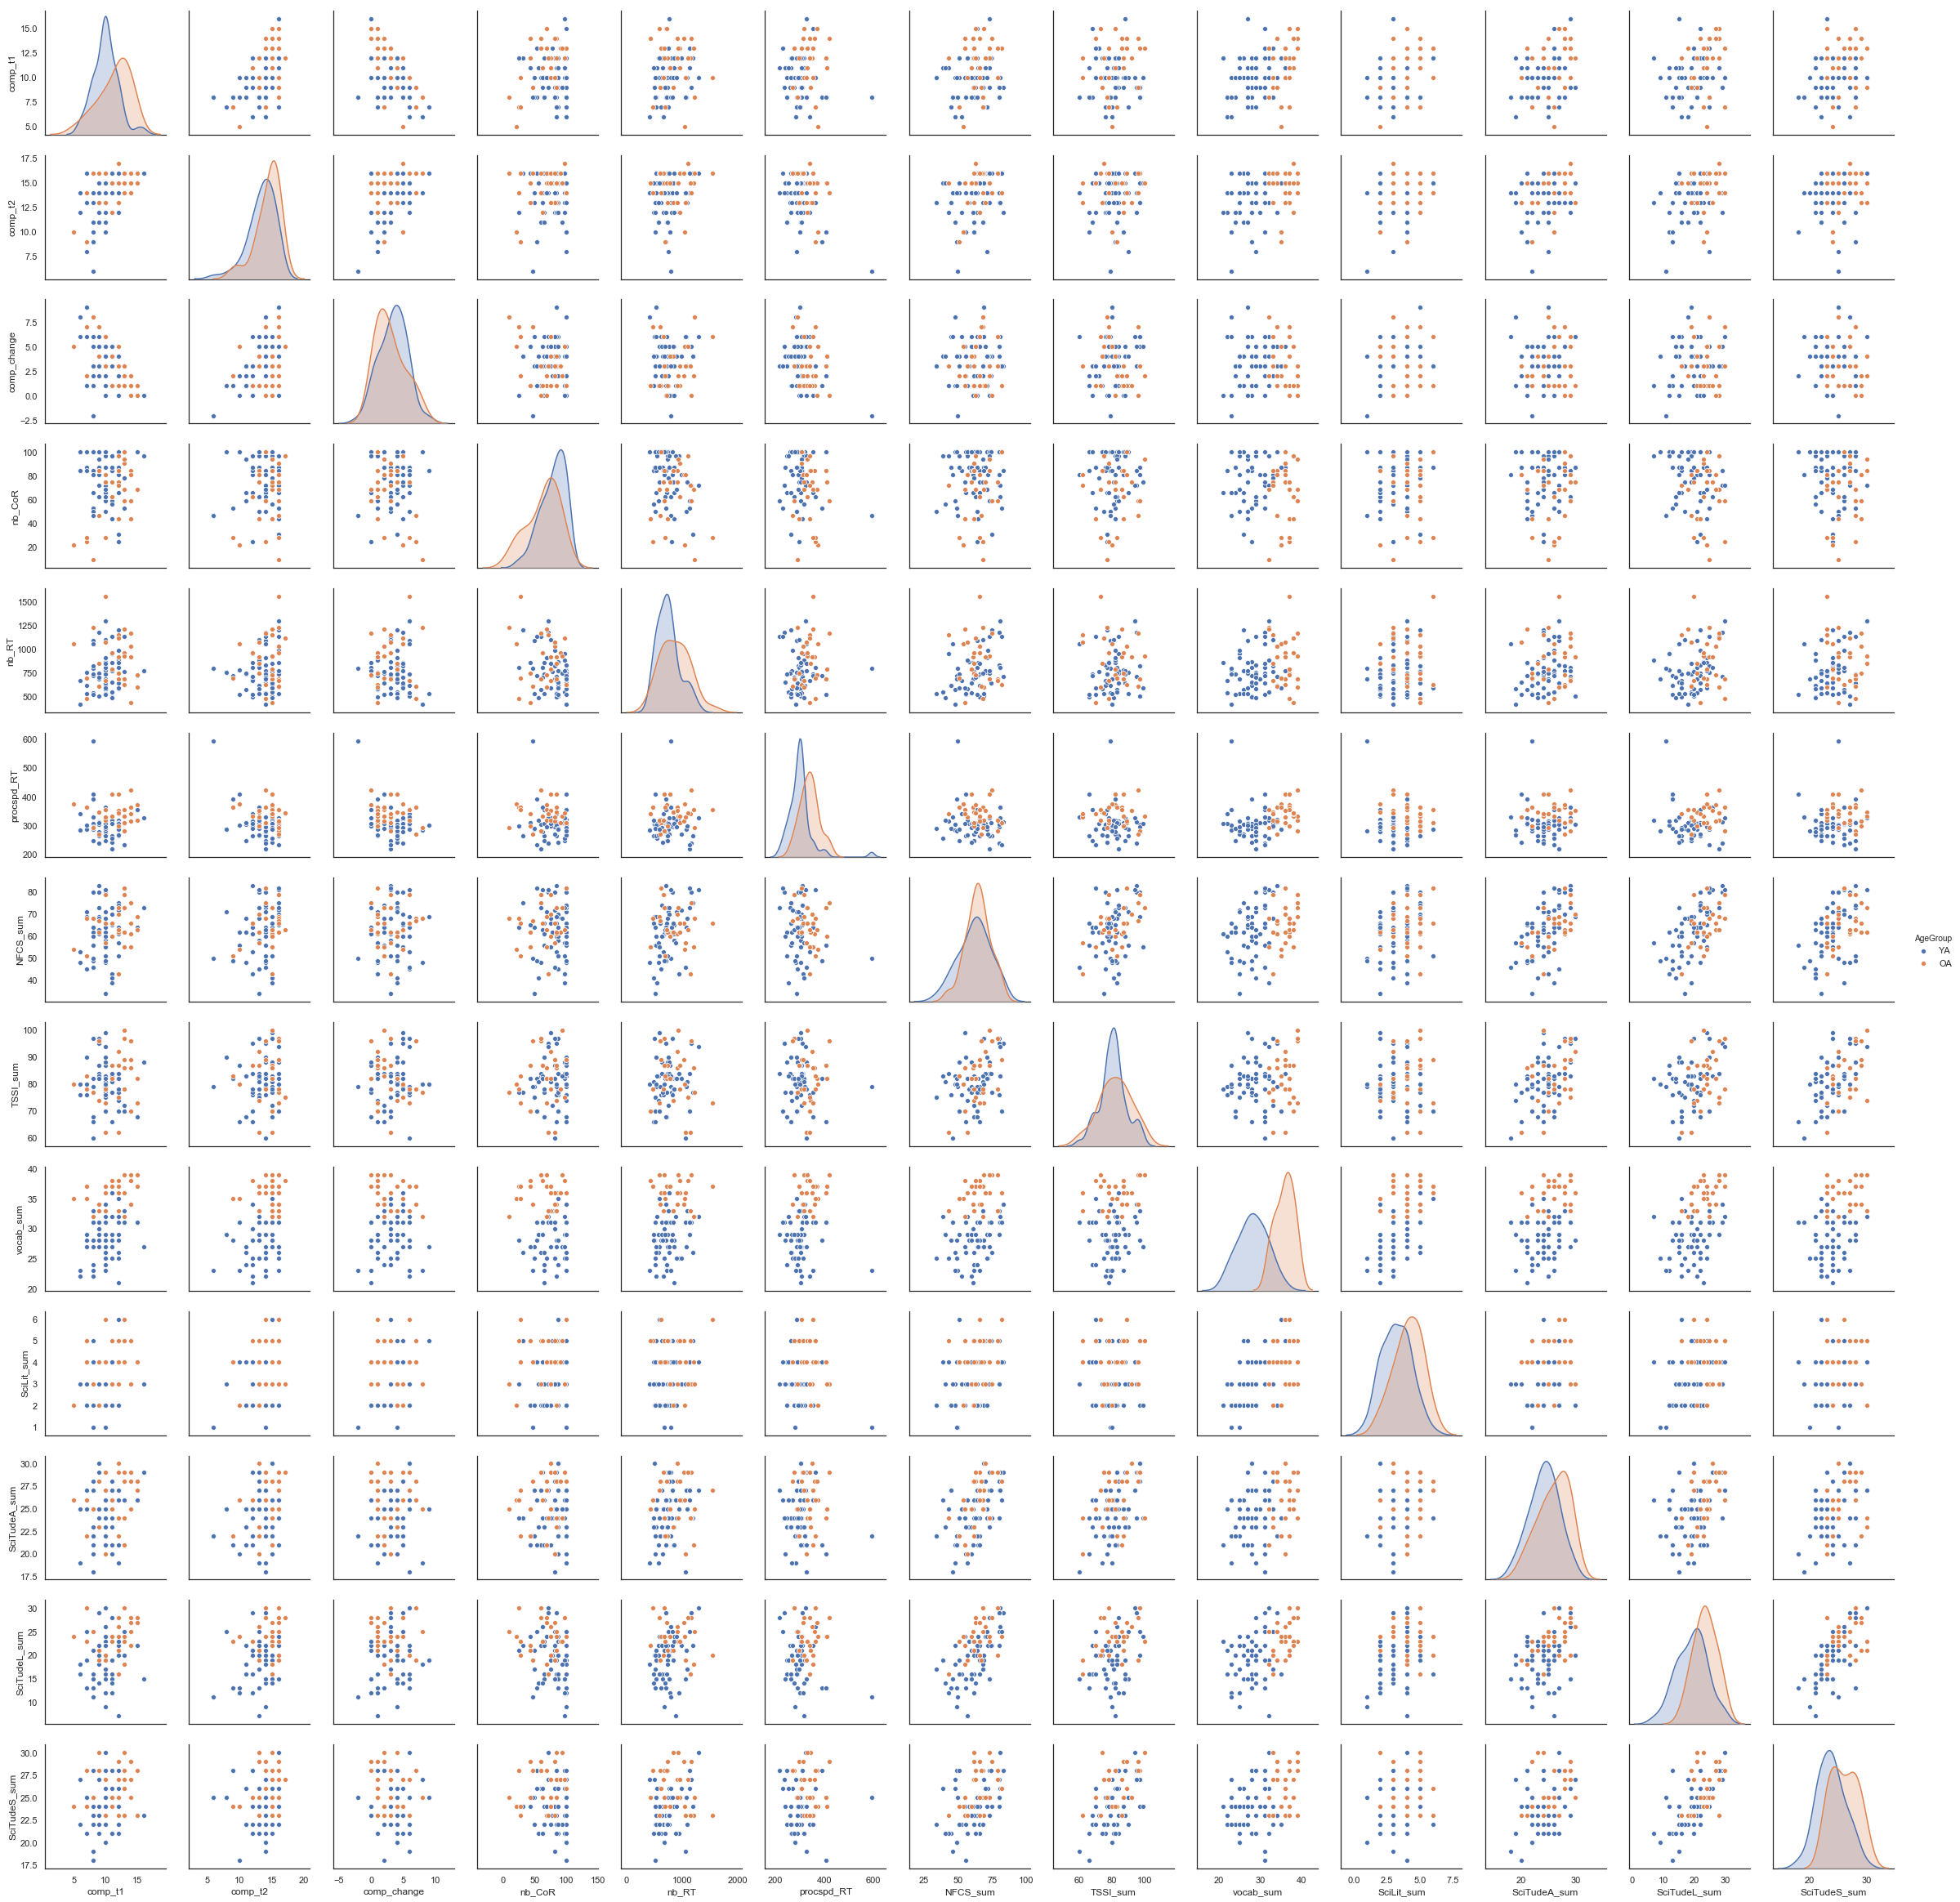

In [29]:
fpath = os.path.join('..','derivatives','figures','AgeGroup_correlogram.png')
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='AgeGroup')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath, bbox_inches='tight')

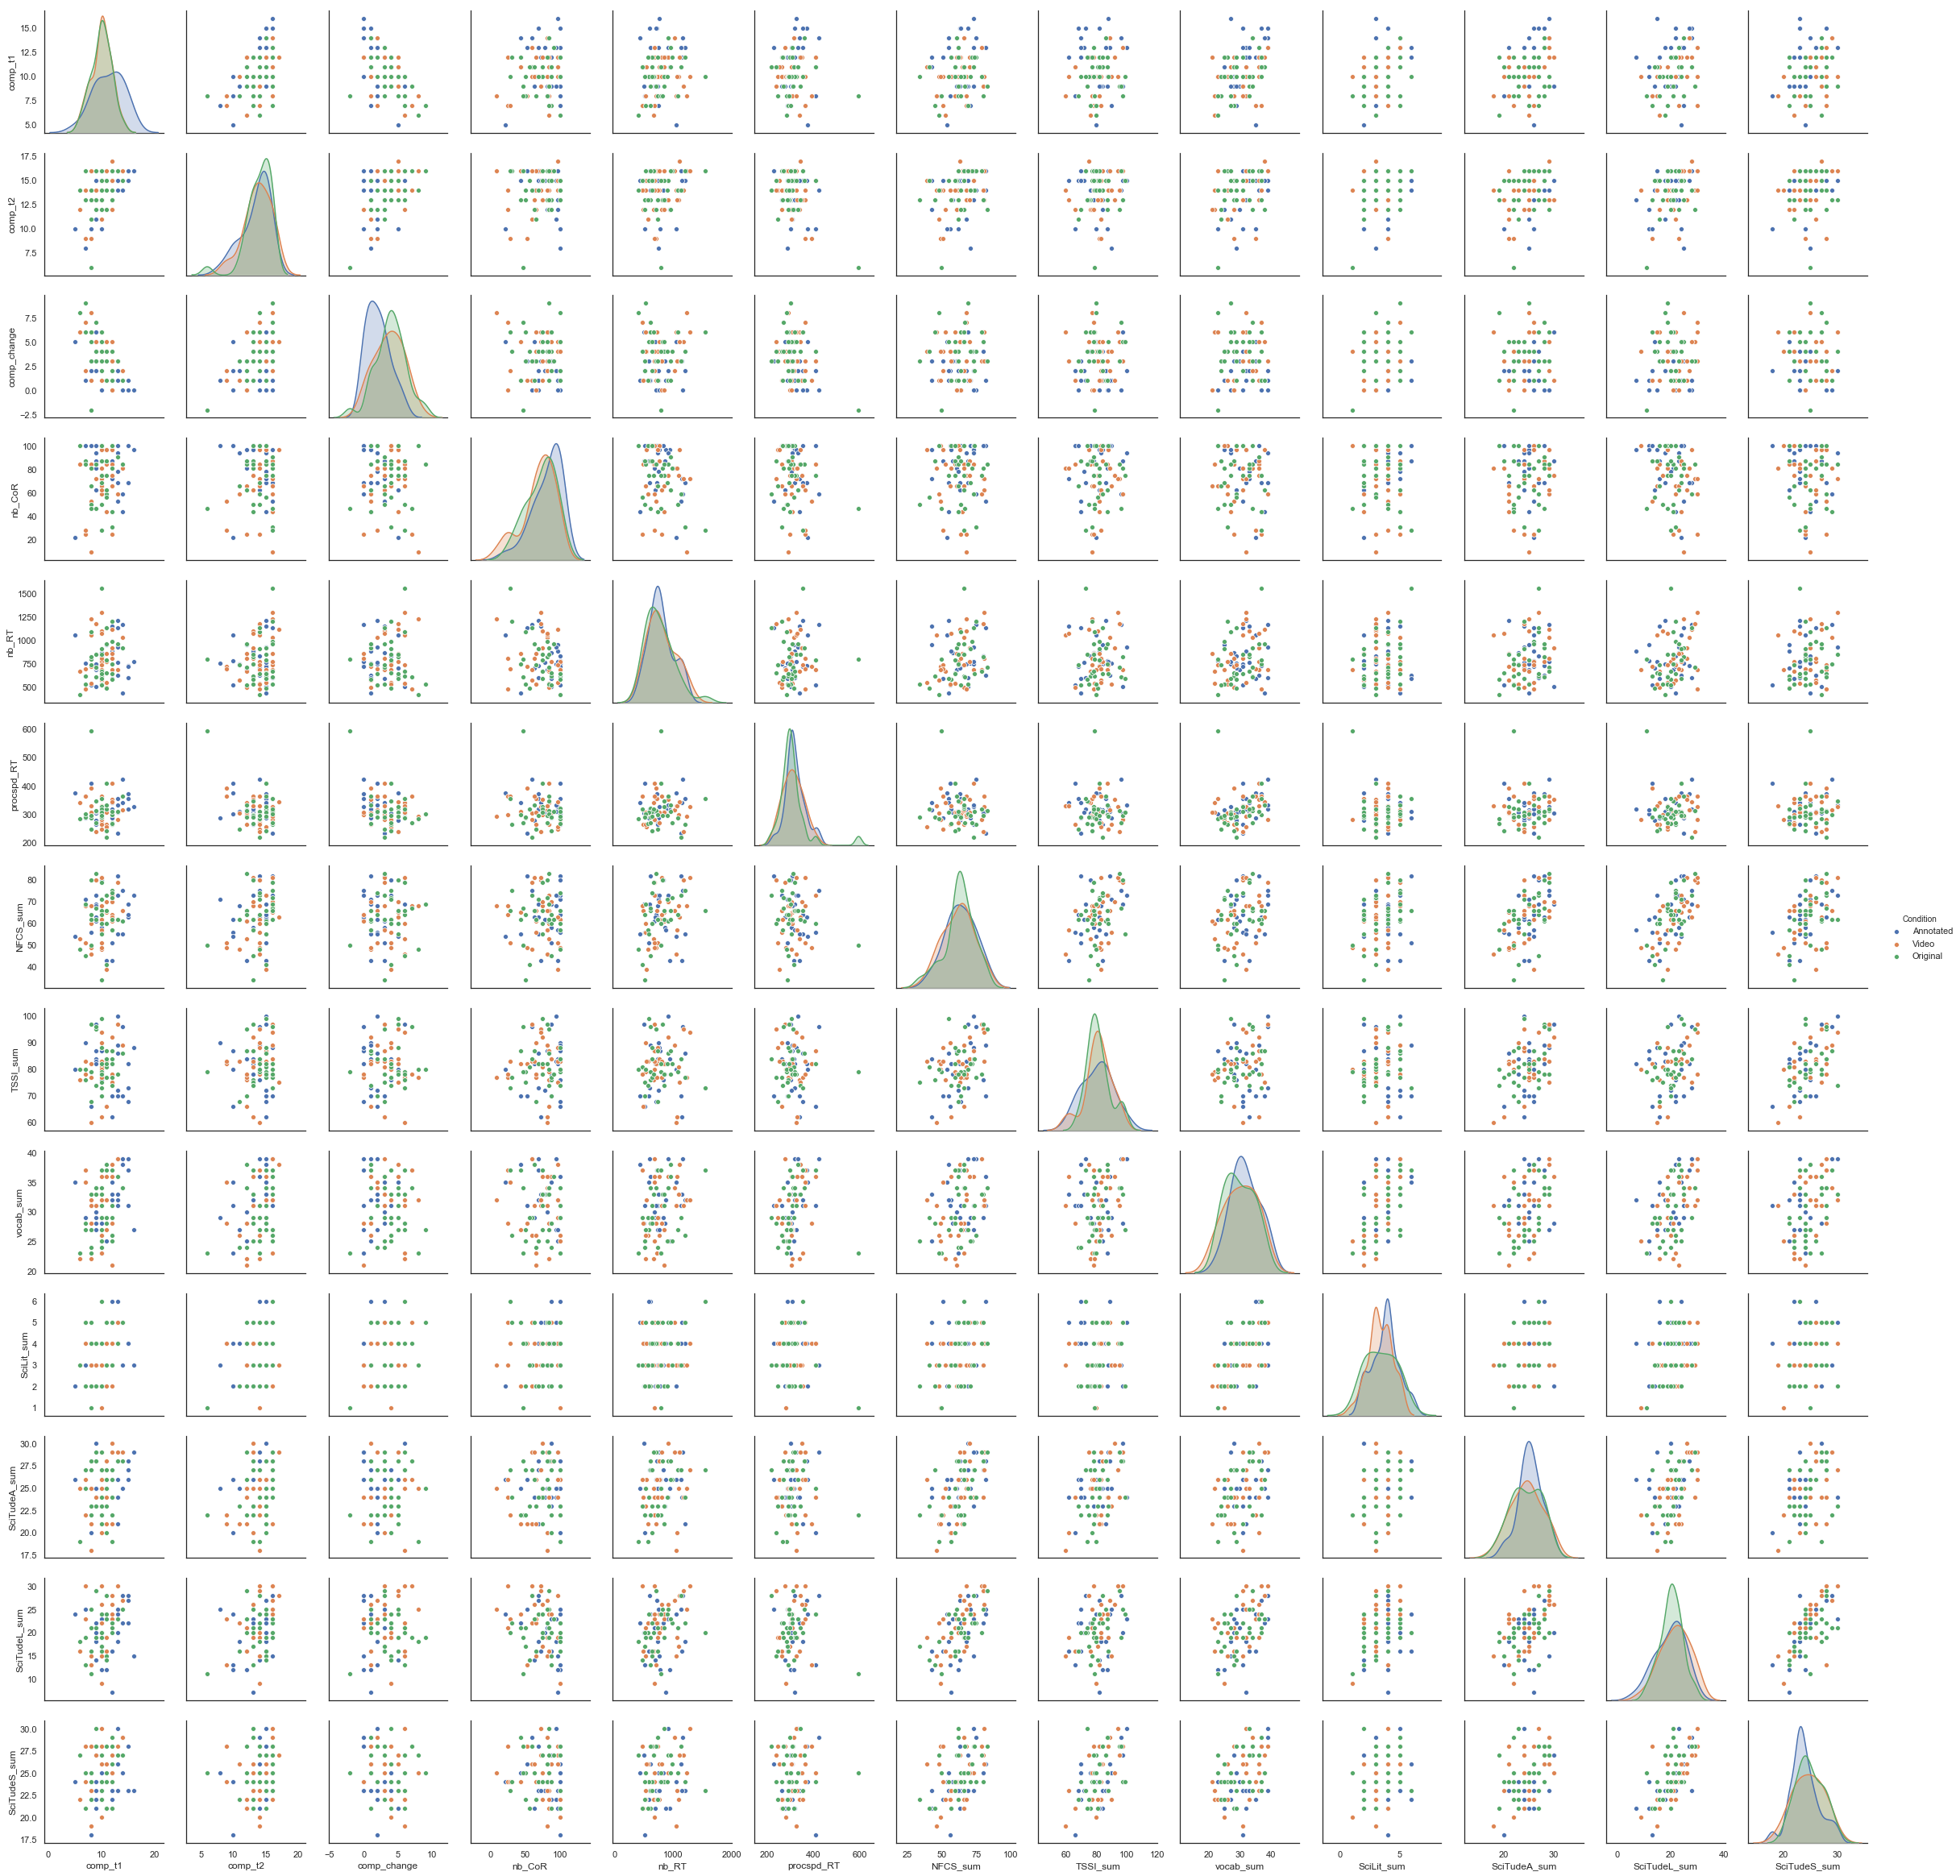

In [30]:
fpath = os.path.join('..','derivatives','figures','Condition_correlogram.png')
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='Condition')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath, bbox_inches='tight')

# Vertical Bar plots

C:\Users\idalt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


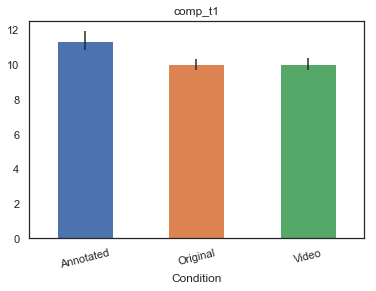

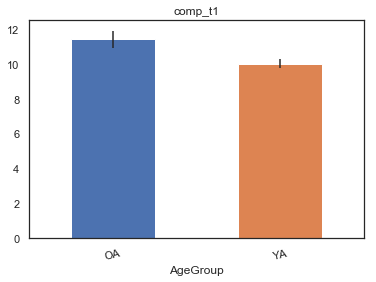

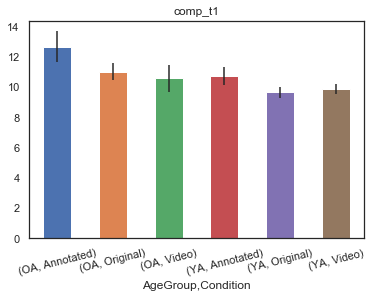

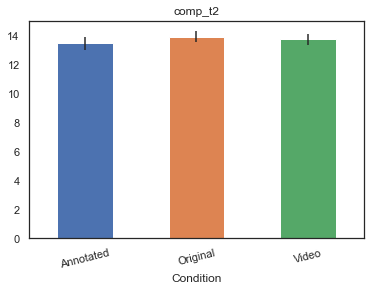

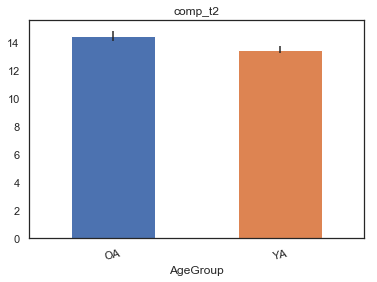

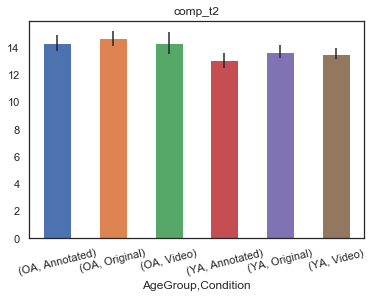

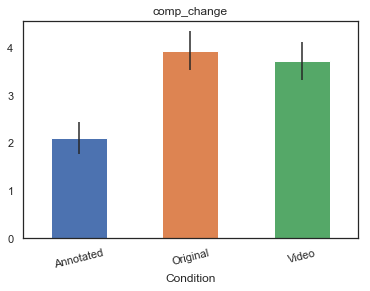

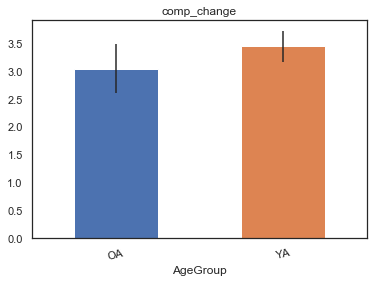

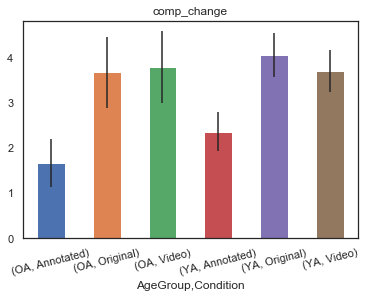

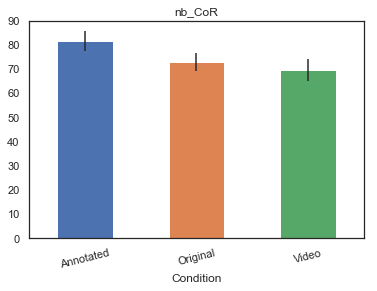

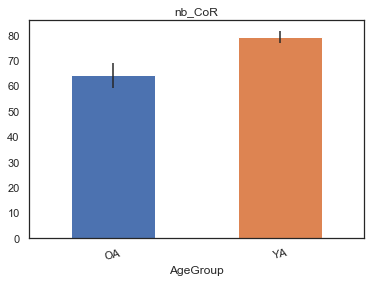

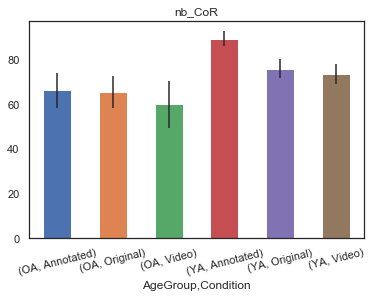

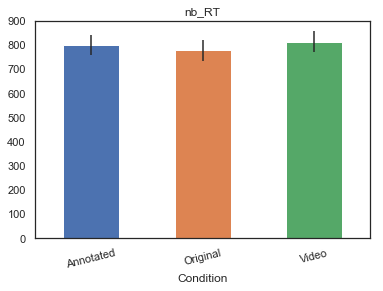

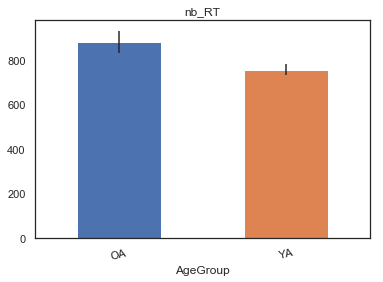

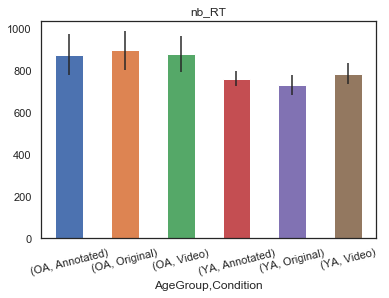

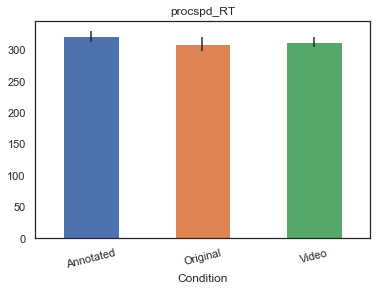

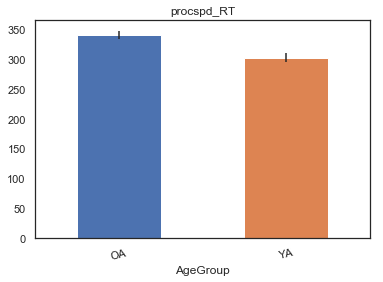

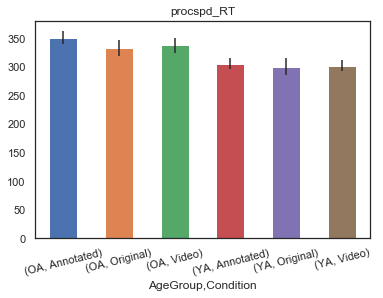

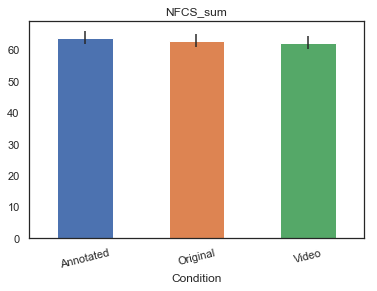

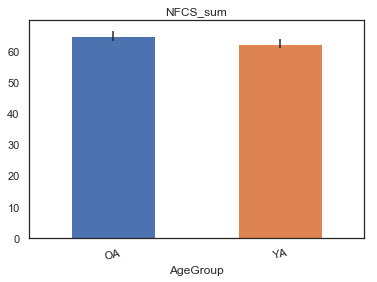

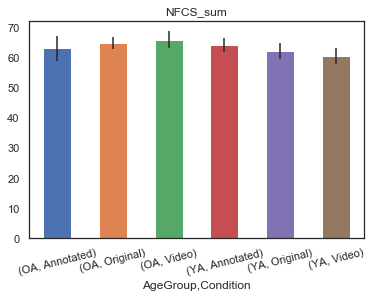

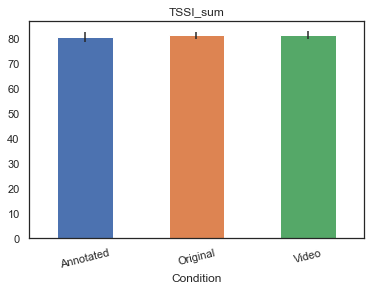

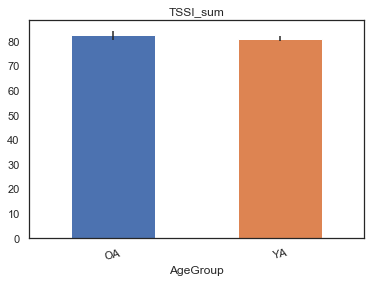

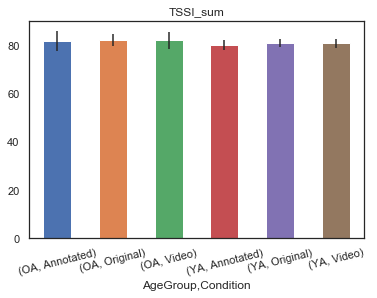

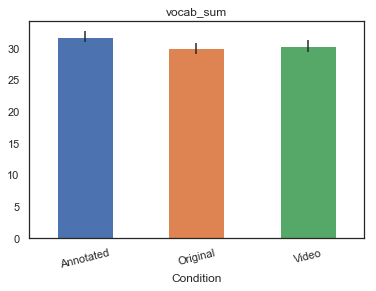

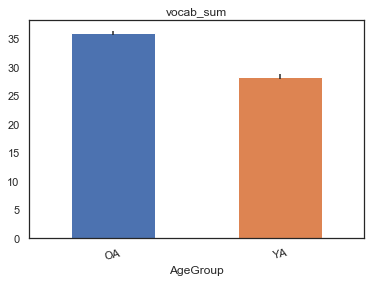

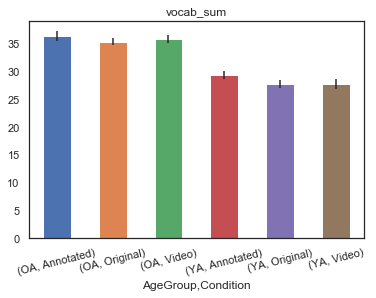

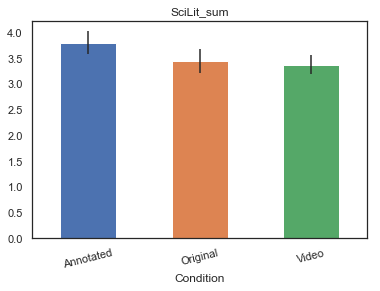

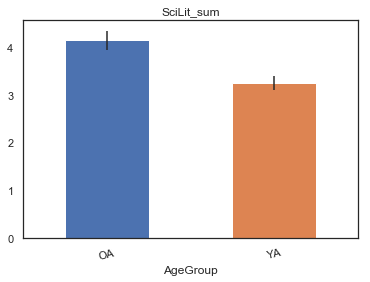

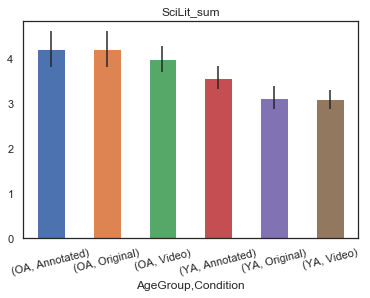

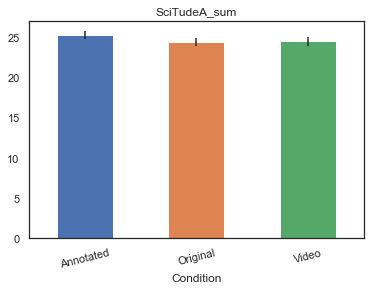

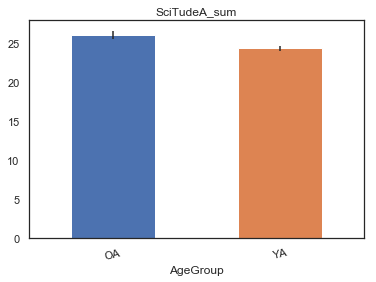

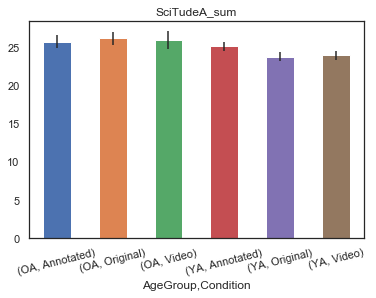

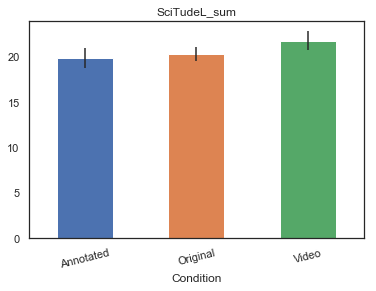

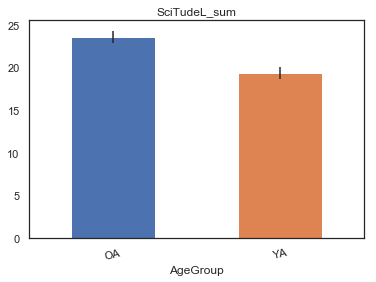

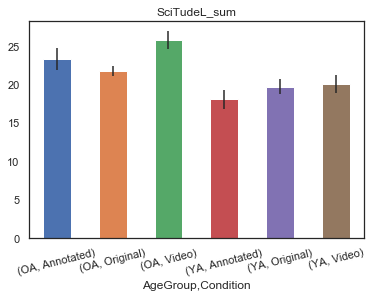

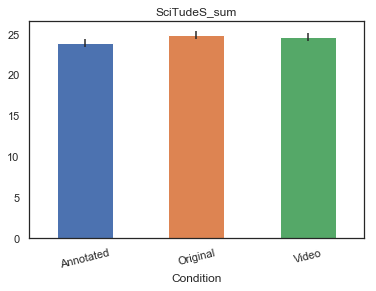

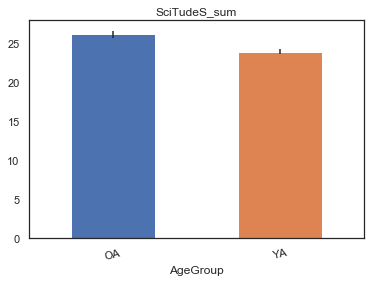

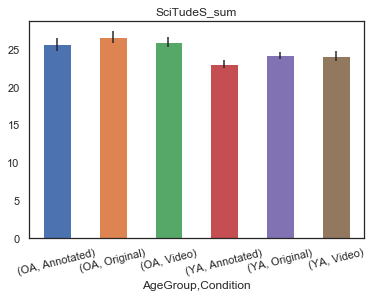

In [31]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = slim_data.groupby(grp).mean()
        sem = slim_data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath, bbox_inches='tight')

# Horizontal Swarm, Strip, Box, Bar plots

..\derivatives\figures\comp_t1_Condition_swarm
..\derivatives\figures\comp_t2_Condition_swarm
..\derivatives\figures\comp_change_Condition_swarm
..\derivatives\figures\nb_CoR_Condition_swarm
..\derivatives\figures\nb_RT_Condition_swarm
..\derivatives\figures\procspd_RT_Condition_swarm
..\derivatives\figures\NFCS_sum_Condition_swarm
..\derivatives\figures\TSSI_sum_Condition_swarm
..\derivatives\figures\vocab_sum_Condition_swarm
..\derivatives\figures\SciLit_sum_Condition_swarm
..\derivatives\figures\SciTudeA_sum_Condition_swarm
..\derivatives\figures\SciTudeL_sum_Condition_swarm
..\derivatives\figures\SciTudeS_sum_Condition_swarm
..\derivatives\figures\comp_t1_AgeGroup_swarm
..\derivatives\figures\comp_t2_AgeGroup_swarm
..\derivatives\figures\comp_change_AgeGroup_swarm
..\derivatives\figures\nb_CoR_AgeGroup_swarm
..\derivatives\figures\nb_RT_AgeGroup_swarm
..\derivatives\figures\procspd_RT_AgeGroup_swarm
..\derivatives\figures\NFCS_sum_AgeGroup_swarm
..\derivatives\figures\TSSI_sum_AgeG

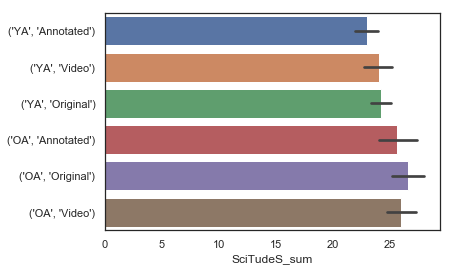

In [32]:
plots_dict = {'swarm':sns.swarmplot,
              'strip':sns.stripplot,
              'box':sns.boxplot,
              'bar':sns.barplot}

for plot in plots_dict.keys():
    for grp in grps_of_interest:
        for var in vars_of_interest:
            try: fig.clear()
            except AttributeError as e: fig=None
            
            fname = var+'_'+''.join(grp)+'_'+plot
            fpath = os.path.join('..','derivatives','figures',fname)
            print(fpath)
            
            df = slim_data.set_index(grp)
            fig = plots_dict[plot](x=var, y=df.index, data=df)
            fig.get_figure().savefig(fpath, bbox_inches='tight')